In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [7]:
df = pd.read_csv('data.csv')

In [8]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [9]:
df.info()
#columns to drop team_id redundant, team_name, game_date, oppoonent is redundant, lat, long we don't need, drop opponent keep matchup

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

## EDA ##

In [10]:
def combine_time_seconds(row):
    total_seconds = row['minutes_remaining'] * 60 + row['seconds_remaining']
    return total_seconds

# apply the func
df['seconds_remaining'] = df.apply(combine_time_seconds, axis=1)

In [11]:
df.drop(columns=['team_id', 'team_name', 'game_date', 'opponent', 'lat', 'lon', 'minutes_remaining'], inplace = True)

In [12]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,loc_x,loc_y,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,matchup,shot_id
0,Jump Shot,Jump Shot,10,20000012,167,72,1,0,2000-01,627,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,LAL @ POR,1
1,Jump Shot,Jump Shot,12,20000012,-157,0,1,0,2000-01,622,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,LAL @ POR,2
2,Jump Shot,Jump Shot,35,20000012,-101,135,1,0,2000-01,465,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,LAL @ POR,3
3,Jump Shot,Jump Shot,43,20000012,138,175,1,0,2000-01,412,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,LAL @ POR,4
4,Driving Dunk Shot,Dunk,155,20000012,0,0,2,0,2000-01,379,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,LAL @ POR,5


In [13]:
df.isna().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
loc_x                    0
loc_y                    0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
matchup                  0
shot_id                  0
dtype: int64

In [14]:
test = df[(df['shot_made_flag'].isna())]

In [15]:
test.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id',
       'loc_x', 'loc_y', 'period', 'playoffs', 'season', 'seconds_remaining',
       'shot_distance', 'shot_made_flag', 'shot_type', 'shot_zone_area',
       'shot_zone_basic', 'shot_zone_range', 'matchup', 'shot_id'],
      dtype='object')

In [16]:
test.set_index('shot_id', inplace=True)

In [17]:
test.shape

(5000, 17)

In [18]:
train = df[(df['shot_made_flag'].isna() == False)]
train.set_index('shot_id', inplace=True)

In [19]:
train.shape

(25697, 17)

In [20]:
train.head(5)

,action_type,combined_shot_type,game_event_id,game_id,loc_x,loc_y,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,matchup
shot_id,,,,,,,,,,,,,,,,,
2,Jump Shot,Jump Shot,12,20000012,-157,0,1,0,2000-01,622,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,LAL @ POR
3,Jump Shot,Jump Shot,35,20000012,-101,135,1,0,2000-01,465,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,LAL @ POR
4,Jump Shot,Jump Shot,43,20000012,138,175,1,0,2000-01,412,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,LAL @ POR
5,Driving Dunk Shot,Dunk,155,20000012,0,0,2,0,2000-01,379,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,LAL @ POR
6,Jump Shot,Jump Shot,244,20000012,-145,-11,3,0,2000-01,572,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,LAL @ POR


In [21]:
train.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id',
       'loc_x', 'loc_y', 'period', 'playoffs', 'season', 'seconds_remaining',
       'shot_distance', 'shot_made_flag', 'shot_type', 'shot_zone_area',
       'shot_zone_basic', 'shot_zone_range', 'matchup'],
      dtype='object')

In [22]:
test.drop(columns= 'shot_made_flag', inplace=True)

C:\Users\ellio\AppData\Local\Temp\ipykernel_11156\3994331225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns= 'shot_made_flag', inplace=True)


In [23]:
test.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id',
       'loc_x', 'loc_y', 'period', 'playoffs', 'season', 'seconds_remaining',
       'shot_distance', 'shot_type', 'shot_zone_area', 'shot_zone_basic',
       'shot_zone_range', 'matchup'],
      dtype='object')

In [24]:
train['shot_made_flag'].value_counts(normalize=True) #baseline

shot_made_flag
0.0    0.553839
1.0    0.446161
Name: proportion, dtype: float64

In [25]:
train['matchup'].value_counts()

matchup
LAL @ SAS      853
LAL vs. SAS    765
LAL @ PHX      751
LAL @ SAC      751
LAL vs. HOU    722
              ... 
LAL @ PHO       29
LAL vs. NOP     21
LAL vs. SAN     20
LAL @ UTH       15
LAL vs. BKN     13
Name: count, Length: 74, dtype: int64

In [26]:
#train['shot_zone_range'] = train['shot_zone_range'].map({'Less than 8 ft.' : 0, '16-24 ft.' : 2, '8-16 ft.': 1, '24+ ft.' : 3})

In [35]:
testdumb = pd.get_dummies(test, columns=['shot_zone_range', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'combined_shot_type'])
traindumb = pd.get_dummies(train, columns=['shot_zone_range', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'combined_shot_type'])


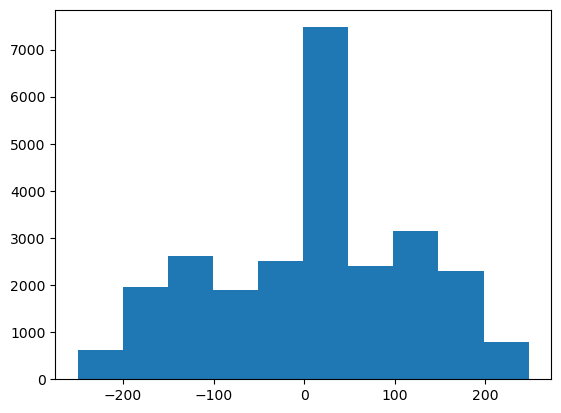

In [28]:
plt.hist(train['loc_x']);

This looks like the shape of a basketball paint which makes sense he takes the most shots from dead on.

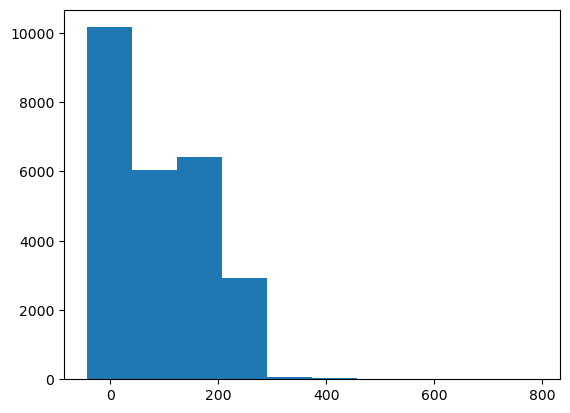

In [29]:
plt.hist(train['loc_y']);

And here we see shots fall off with distance away from the basket y down the court.

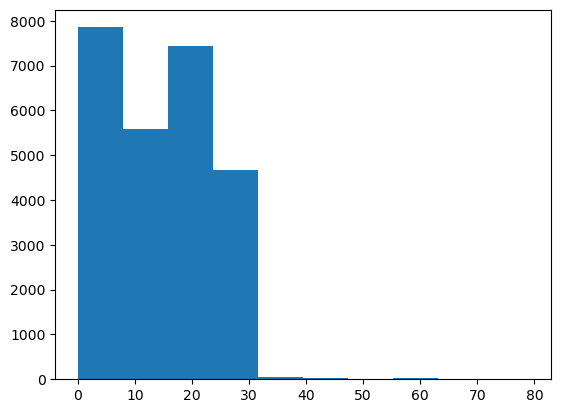

In [30]:
plt.hist(train['shot_distance']);

In [31]:
train['shot_distance'].mean()

13.457096159084719

In [39]:
testdumb.to_csv('test.csv')
traindumb.to_csv('train.csv')

So this spike here at 20 ft compared to the loc_y, because he takes extra shots from straight in front of the 3 point line basket where the spike in X_loc shots is. 

## Modeling ##

lr = LogisticRegression()

In [53]:
lr = LogisticRegression
X = traindumb.drop(columns=['shot_made_flag', 'action_type', 'matchup', 'season'])
y = traindumb['shot_made_flag']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25697 entries, 2 to 30697
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   game_event_id                          25697 non-null  int64
 1   game_id                                25697 non-null  int64
 2   loc_x                                  25697 non-null  int64
 3   loc_y                                  25697 non-null  int64
 4   period                                 25697 non-null  int64
 5   playoffs                               25697 non-null  int64
 6   seconds_remaining                      25697 non-null  int64
 7   shot_distance                          25697 non-null  int64
 8   shot_zone_range_16-24 ft.              25697 non-null  bool 
 9   shot_zone_range_24+ ft.                25697 non-null  bool 
 10  shot_zone_range_8-16 ft.               25697 non-null  bool 
 11  shot_zone_range_Back Court Shot  

In [55]:
lr.fit(X_train,y_train)

AttributeError: 'DataFrame' object has no attribute '_validate_params'